In [34]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt

data = fetch_california_housing(as_frame=True, return_X_y=False)
df=data.frame

In [35]:
# feature extraction
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# model selection and training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
# model prediction
'''
If R² is high (close to 1)

→ Model captures patterns well.

If RMSE is low

→ Predictions are close to actual values.

If RMSE ≈ MAE

→ Errors are evenly distributed; no major outliers.

If RMSE >> MAE

→ Model has large errors → bad model.

If residual plot shows random scatter

→ Model assumptions are valid.

'''
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error is: {mse}')
print(f'Root Mean Square is: {rmse}')
print(f'Mean Absolute Error is: {mae}')
print(f"The R2 score is: {r2}")

Mean Squared Error is: 0.5558915986952444
Root Mean Square is: 0.7455813830127764
Mean Absolute Error is: 0.5332001304956565
The R2 score is: 0.5757877060324508


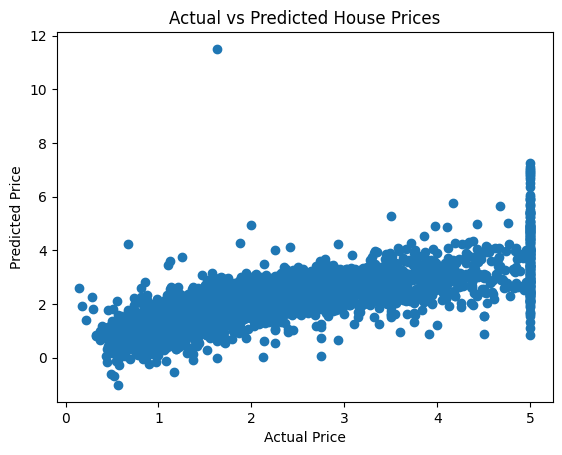

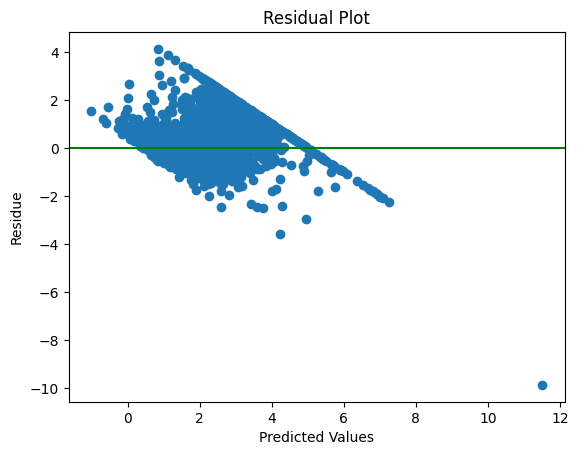

In [49]:
# visualization
# 1. Actual vs Predicted plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

# 2. Residual plot
residue = y_test-y_pred
plt.scatter(y_pred, residue)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residue")
plt.axhline(0, color="green")
plt.show()